In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [6]:
df=pd.read_csv(r"D:\100 Days machine learning\Min_Max_scaling(Normalization)\data.csv",usecols=[0,1,2,])

In [15]:
df

,Height,Weight,family_history_with_overweight
0,1.620000,64.000000,1
1,1.520000,56.000000,1
2,1.800000,77.000000,1
3,1.800000,87.000000,0
4,1.780000,89.800000,0
...,...,...,...
2081,1.710730,131.408528,1
2082,1.748584,133.742943,1
2083,1.752206,133.689352,1
2084,1.739450,133.346641,1


<Axes: xlabel='Height', ylabel='Density'>

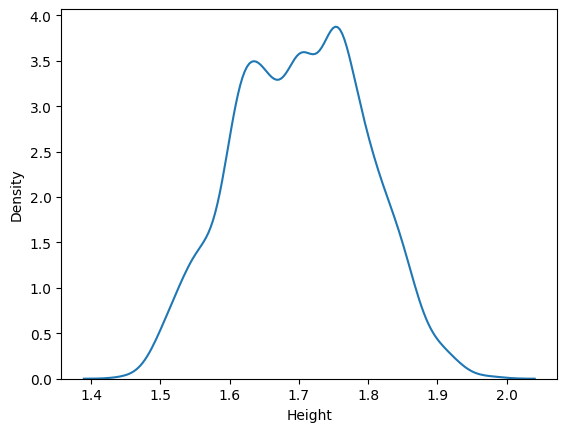

In [8]:
sns.kdeplot(df['Height'])

<Axes: xlabel='Weight', ylabel='Density'>

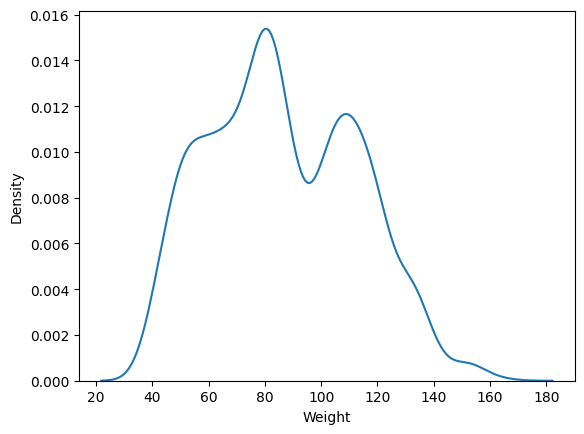

In [9]:
sns.kdeplot(df['Weight'])

<Axes: xlabel='Weight', ylabel='Height'>

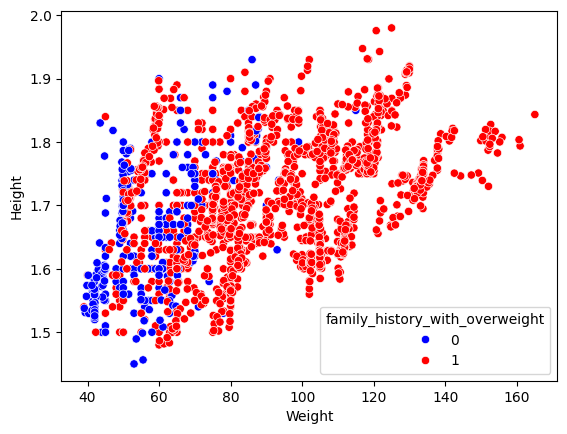

In [17]:
color_dict={1:'red',0:'blue'}
sns.scatterplot(x=df['Weight'],y=df['Height'],hue=df['family_history_with_overweight'],palette=color_dict)

In [19]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test=train_test_split(df.drop('family_history_with_overweight',axis=1),df['family_history_with_overweight'],test_size=0.3,random_state=0)

In [22]:
X_train.shape,X_test.shape

((1460, 2), (626, 2))

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler=MinMaxScaler()

In [26]:
scaler.fit(X_train)

MinMaxScaler()

In [28]:
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [29]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [30]:
np.round(X_train.describe(), 1)

,Height,Weight
count,1460.0,1460.0
mean,1.7,86.6
std,0.1,26.2
min,1.5,39.1
25%,1.6,65.1
50%,1.7,82.6
75%,1.8,108.0
max,2.0,165.1


In [31]:
np.round(X_train_scaled.describe(), 1)

,Height,Weight
count,1460.0,1460.0
mean,0.5,0.4
std,0.2,0.2
min,0.0,0.0
25%,0.3,0.2
50%,0.5,0.3
75%,0.6,0.5
max,1.0,1.0


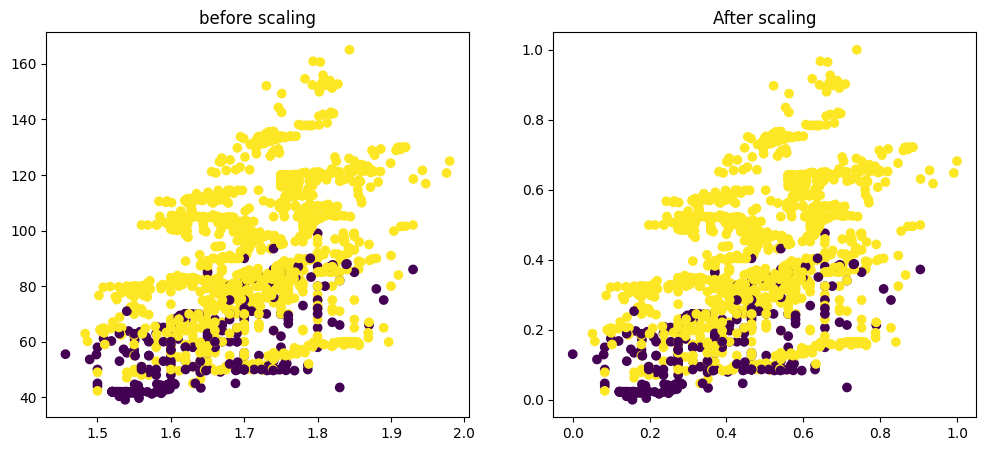

In [40]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1.scatter(X_train['Height'],X_train['Weight'],c=y_train)
ax1.set_title('before scaling')
ax2.scatter(X_train_scaled['Height'],X_train_scaled['Weight'],c=y_train)
ax2.set_title('After scaling')
plt.show()

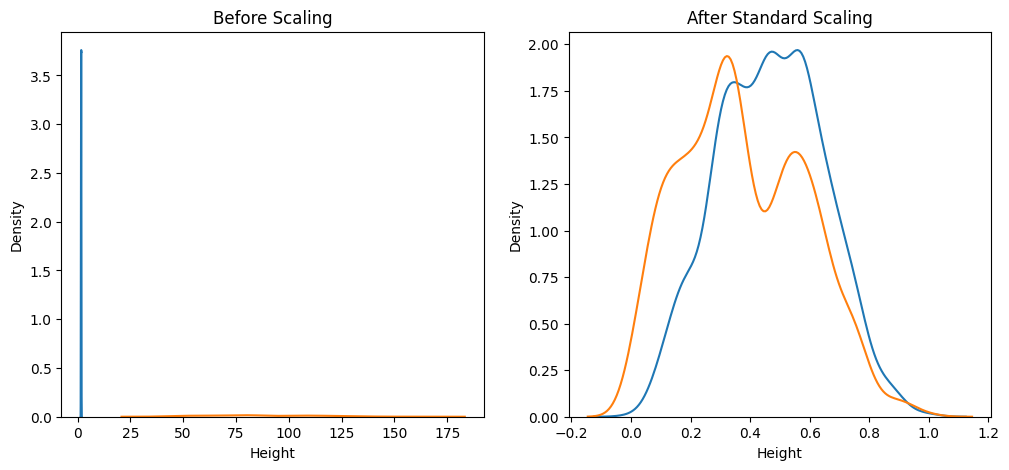

In [41]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Height'], ax=ax1)
sns.kdeplot(X_train['Weight'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Height'], ax=ax2)
sns.kdeplot(X_train_scaled['Weight'], ax=ax2)
plt.show()